## 2022100814 정영훈 타이타닉 데이터셋 분석

### 목차

* [데이터 로드 및 데이터 확인](#1)
* [데이터 탐색 및 시각화](#2)
    * [데이터셋 보호를 위한 데이터셋 복사](#2_1)
    * [데이터 구조 확인 및 개괄적 정보 확인](#2_2)
    * [타겟 변수 확인-Survived](#2_3)<a class="anchor" id=""></a>
    * [성별에 따른 생존률](#2_4)
    * [동승자 여부에 따른 생존률](#2_5)
        1. [Sibsp](#2_5_1)
        2. [Parch](#2_5_2)
        3. [Sipsp&Parch](#2_5_3)
        * [새로운 컬럼 생성](#2_5_4)
    * [객실 등급에 따른 생존률-Pclass](#2_6)
    * [탑승 도시에 따른 생존률-Embarked](#2_7)
* [데이터 정제](#3)
    * [Name의 Title 추출](#3_1)
        1. [Dr](#3_1_1)
        2. [Master](#3_1_2)
    * [데이터 범주화](#3_2)
        1. [Age](#3_2_1)
        2. [Fare](#3_2_2)
    * [결측치 확인 및 기타 처리](#3_3)
        * [테스트세트 결측치 확인](#3_3_1)
        * [Embarked 결측치 처리](#3_3_2)
        * [Cabin 특성 제거](#3_3_3)
        * [데이터 변환](#3_3_4)
            1. [Sex](#3_3_4_1)
            2. [Embarked](#3_3_4_2)
            3. [Title](#3_3_4_3)
            4. [학습에 필요없는 Column 제거](#3_3_4_4)
        * [데이터 타입 통일](#3_3_5)
* [모델 선택](#4)
    * [KNN](#4_1)
    * [결정 트리](#4_2)
    * [랜덤 포레스트](#4_3)
    * [SVM](#4_4)
    * [로지스틱 회귀](#4_5)
    * [선형 회귀](#4_6)
    * [정리](#4_7)
* [모델 학습 및 추론](#5)
    * [SVM](#5_1)
    * [로지스틱 회귀](#5_2)
    
        

### 데이터 로드 및 데이터 확인 <a class="anchor" id="id1"></a>


In [208]:
#필요한 라이브러리 로드

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# matplotlib 폰트설정
import matplotlib.font_manager as fm
plt.rcParams['font.family']='Malgun Gothic'
%matplotlib inline
import seaborn as sns

#train.csv 로드 및 데이터 확인
train = pd.read_csv('./dataset/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [209]:
#train.csv 개괄적인 데이터 구조 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [210]:
#train.csv 상위 5개 데이터 확인
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [211]:
#train.csv 하위 5개 데이터 확인
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [212]:
#test.csv 데이터 로드 및 확인
test = pd.read_csv('./dataset/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [213]:
#test.csv 정보 확인 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 데이터 탐색 및 시각화 <a class="anchor" id="id2"></a>

* Pclass : 객실등급
* SibSp : Sibling Spouse -> 동승자 수 
* Parch : Parent, Child -> 아이와 부모가 함께 탔는지 여부
* Ticket : 티켓 번호
* Fare : 요금
* Cabin : 객실
* Embarked : 승선 위치

+ 데이터 보호를 위해 데이터셋 복사 <a class="anchor" id="id2_1"></a>

In [214]:
train_df=train.copy()
test_df=test.copy()

* 데이터 구조 확인 및 개괄적 정보 확인 <a class="anchor" id="id2_2"></a>

In [215]:
# 데이터의 0번째 행 확인
train.loc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [216]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 타겟 변수 확인 : 생존 여부를 결정하는 Survived의 그래프 확인 <a class="anchor" id="2_3"></a>

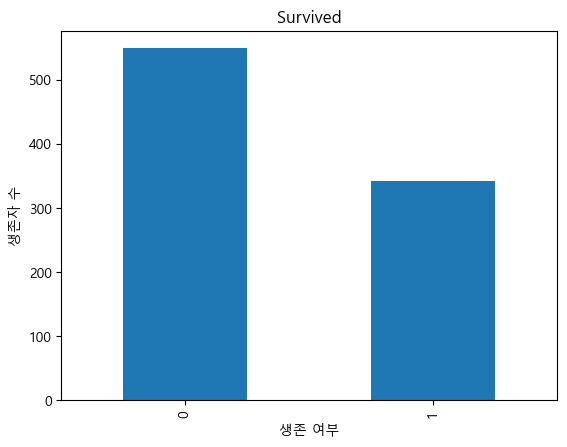

In [217]:
train_df['Survived'].value_counts().plot.bar()
plt.xlabel('생존 여부')
plt.ylabel('생존자 수')
plt.title('Survived')
plt.show()

* 성별에 따른 생존률 - Sex <a class="anchor" id="2_4"></a>

In [218]:
#male 생존률 / 사망률
total_male = train_df[train_df['Sex'] == 'male'].shape[0]
total_female = train_df[train_df['Sex'] == 'female'].shape[0]
survived_male = train_df[(train_df['Sex'] == 'male') & (train_df['Survived'] == 1)].shape[0]


survival_rate_male = (survived_male / total_male) * 100
dead_male_rate = ((total_male - survived_male) / total_male) * 100
survival_rate_male


18.890814558058924

In [219]:
#female 생존률/사망률
survived_female = train_df[(train_df['Sex'] == 'female') & (train_df['Survived'] == 1)].shape[0]
total_female = train_df[train_df['Sex'] == 'female'].shape[0]
survival_rate_female = (survived_female / total_female) * 100
dead_female_rate = ((total_female - survived_female) / total_female) * 100
survival_rate_female 

74.20382165605095

Text(0.5, 1.0, '성별에 따른 생존률')

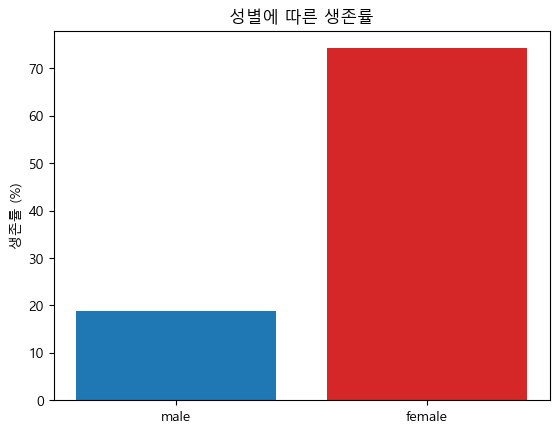

In [220]:
fig, ax = plt.subplots()
sex = train_df.Sex.unique().tolist()
counts_sex= [survival_rate_male, survival_rate_female]
bar_colors = ['tab:blue', 'tab:red']

ax.bar(sex, counts_sex, color=bar_colors)
ax.set_ylabel('생존률 (%)')
ax.set_title('성별에 따른 생존률')

**남성의 생존률이 여성의 생존률보다 낮다**는 결과를 도출 할 수 있다.

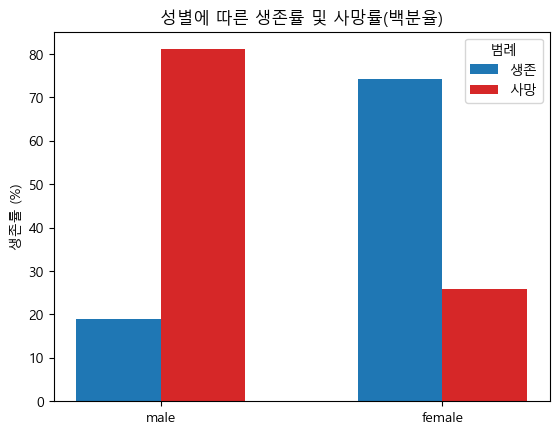

In [221]:
fig, ax = plt.subplots()
sex = train_df.Sex.unique().tolist()
survived_rate_sex = [survival_rate_male, survival_rate_female]
dead_rate = [dead_male_rate, dead_female_rate]
x = np.arange(len(sex))
width = 0.3

ax.bar(x, survived_rate_sex, width, label='생존', color='tab:blue')
ax.bar(x + width, dead_rate, width, color='tab:red', label='사망')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(sex)
ax.set_title('성별에 따른 생존률 및 사망률(백분율)')
ax.set_ylabel('생존률 (%)')
ax.legend(title='범례')

plt.show()


* 동승자 여부에 따른 생존률 <a class="anchor" id="2_5"></a>
    1. SibSp
    2. Parch
    3. SibSp&Parch
1. SibSp <a class="anchor" id="2_5_1"></a>

In [222]:
total_sibsp = train_df.groupby('SibSp').size()
survived_sibsp = train_df[train_df['Survived'] == 1].groupby('SibSp').size()
survival_rate_sibsp = (survived_sibsp / total_sibsp) * 100
dead_rate_sibsp = ((total_sibsp - survived_sibsp) / total_sibsp) * 100
survival_rate_sibsp

SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5          NaN
8          NaN
dtype: float64

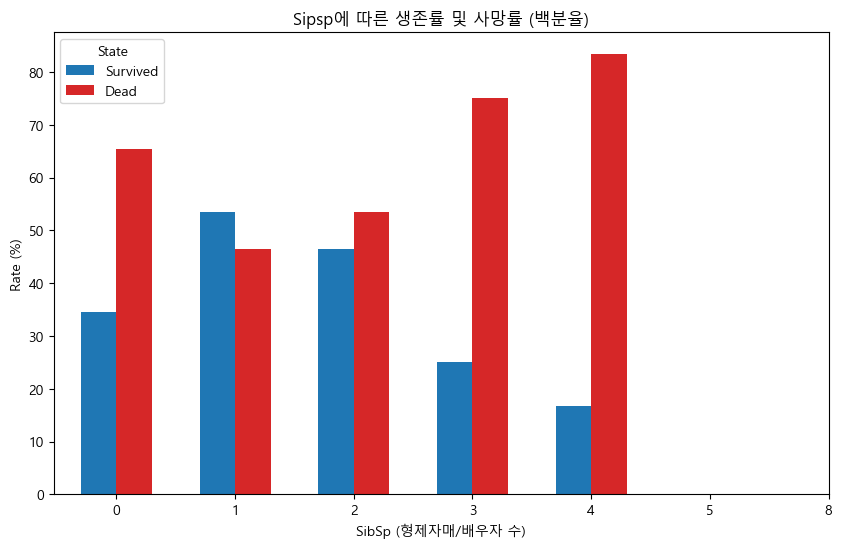

In [223]:
fig, ax = plt.subplots(figsize=(10, 6))
sibsp_values = total_sibsp.index.tolist()  # SibSp의 고유값
x = np.arange(len(sibsp_values))  # x축 위치
width = 0.3
# 생존률 및 사망률 그래프
ax.bar(x, survival_rate_sibsp, width, label='Survived', color='tab:blue')
ax.bar(x + width, dead_rate_sibsp, width, label='Dead', color='tab:red')

# x축 설정
ax.set_xticks(x + width / 2)
ax.set_xticklabels(sibsp_values)
ax.set_title('Sipsp에 따른 생존률 및 사망률 (백분율)')
ax.set_xlabel('SibSp (형제자매/배우자 수)')
ax.set_ylabel('Rate (%)')
ax.legend(title='State')

plt.show()

**동승한 형제 자매의  수가 1명인 경우 생존률이 가장 높지만, 점점 우하향**하는것을 확인 가능, 본 데이터로는 규칙성 찾기 어려움

2.  Parch <a class="anchor" id="2_5_2"></a>

In [224]:
total_parch = train_df.groupby('Parch').size()
survived_parch = train_df[train_df['Survived'] == 1].groupby('Parch').size()
survival_rate_parch = (survived_parch / total_parch) * 100
dead_rate_parch = ((total_parch - survived_parch) / total_parch) * 100


survival_rate_parch

Parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4          NaN
5    20.000000
6          NaN
dtype: float64

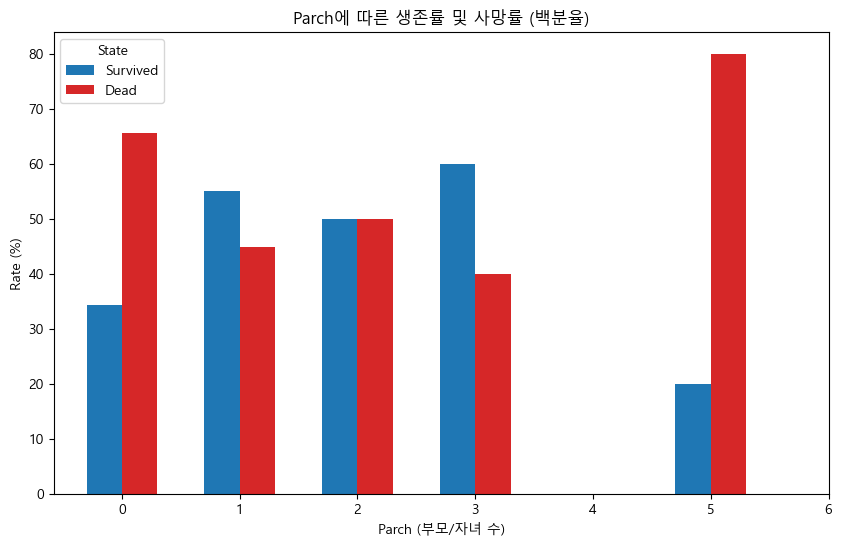

In [225]:
fig, ax = plt.subplots(figsize=(10, 6))
parch_values = total_parch.index.tolist()  # Parch의 고유값
x = np.arange(len(parch_values))  # x축 위치
width = 0.3

# 생존률 및 사망률 그래프
ax.bar(x, survival_rate_parch, width, label='Survived', color='tab:blue')
ax.bar(x + width, dead_rate_parch, width, label='Dead', color='tab:red')

# x축 설정
ax.set_xticks(x + width / 2)
ax.set_xticklabels(parch_values)
ax.set_title('Parch에 따른 생존률 및 사망률 (백분율)')
ax.set_xlabel('Parch (부모/자녀 수)')
ax.set_ylabel('Rate (%)')
ax.legend(title='State')

plt.show()

**자녀 3명이상의 대가족이 아닌경우, 자녀의 수가 많을수록 대체적으로 생존률이 높아진다**는 것을 확인 가능



3. Sipsp & Parch  <a class="anchor" id="2_5_3"></a>  
이 경우    
1.자녀와 형제자매를 모두 데려온 경우.    
2.가족만 데려온 경우.    
3.자녀만 데려온경우.    
4.둘다 데려오지 않은 경우    
4가지 케이스로 나눠 계산한다.

In [226]:
# 조건별 데이터 분리
with_family = train_df[(train_df['SibSp'] > 0) & (train_df['Parch'] > 0)]  # 자녀와 형제자매 모두 데려온 경우
sibsp_only = train_df[(train_df['SibSp'] > 0) & (train_df['Parch'] == 0)]  # 형제자매만 데려온 경우
parch_only = train_df[(train_df['SibSp'] == 0) & (train_df['Parch'] > 0)]  # 자녀만 데려온 경우
neither = train_df[(train_df['SibSp'] == 0) & (train_df['Parch'] == 0)]    # 둘 다 데려오지 않은 경우

# 생존률 및 사망률 계산 함수
def calculate_rates(df):
    total = df.shape[0]
    if total == 0:  # 데이터가 없는 경우 예외 처리
        return 0, 0
    survived = df[df['Survived'] == 1].shape[0]
    dead = total - survived
    survival_rate = (survived / total) * 100
    dead_rate = (dead / total) * 100
    return survival_rate, dead_rate



# 각 그룹의 생존률 및 사망률 계산
with_family_rates = calculate_rates(with_family)
sibsp_only_rates = calculate_rates(sibsp_only)
parch_only_rates = calculate_rates(parch_only)
neither_rates = calculate_rates(neither)

with_family_rates

(43.66197183098591, 56.33802816901409)

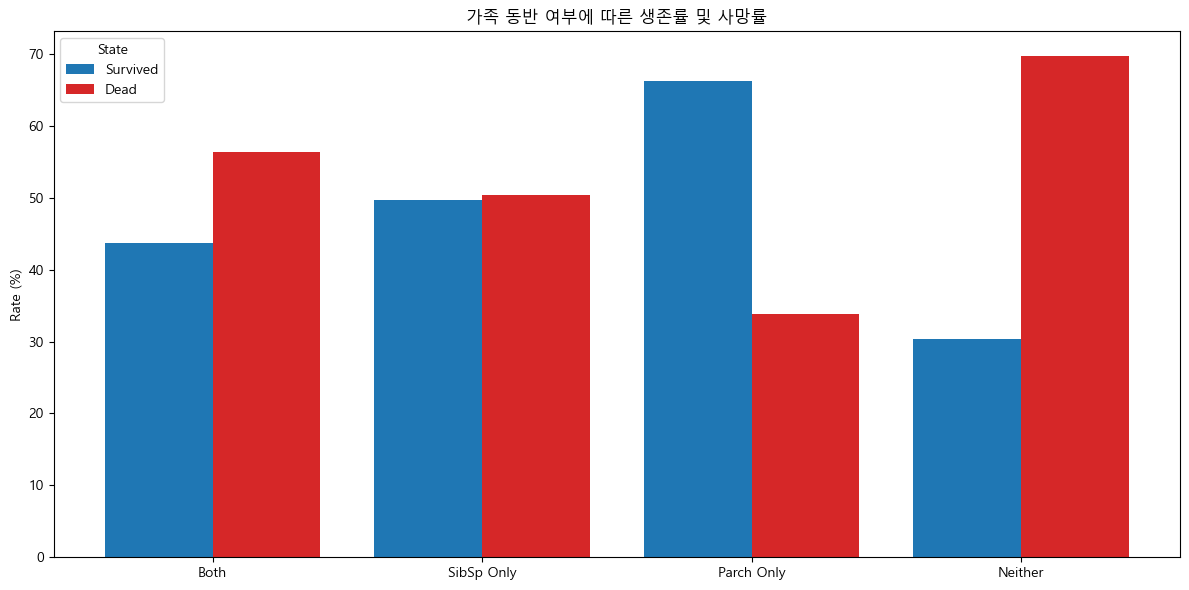

In [227]:
categories_family = ['Both', 'SibSp Only', 'Parch Only', 'Neither']
survival_rates_family = [with_family_rates[0], sibsp_only_rates[0], parch_only_rates[0], neither_rates[0]]
dead_rates_family = [with_family_rates[1], sibsp_only_rates[1], parch_only_rates[1], neither_rates[1]]

x = np.arange(len(categories_family))  # x축 위치
width = 0.4  # 막대 너비
fig, ax = plt.subplots(figsize=(12, 6))

# 생존률과 사망률 그래프
ax.bar(x - width / 2, survival_rates_family, width, label='Survived', color='tab:blue')
ax.bar(x + width / 2, dead_rates_family, width, label='Dead', color='tab:red')

# 그래프 꾸미기
ax.set_title('가족 동반 여부에 따른 생존률 및 사망률')
ax.set_xticks(x)
ax.set_xticklabels(categories_family)
ax.set_ylabel('Rate (%)')
ax.legend(title='State')

plt.tight_layout()
plt.show()

* 새로운 컬럼 생성 <a class="anchor" id="2_5_4"></a>

In [228]:
# 새로운 'Family' 컬럼 생성
def assign_family_category(row):
    if row['SibSp'] > 0 and row['Parch'] > 0:
        return 3  # Both
    elif row['SibSp'] > 0:
        return 1  # SibSp Only
    elif row['Parch'] > 0:
        return 2  # Parch Only
    else:
        return 0  # Neither

# 'Family' 컬럼을 train_df와 test_df에 추가
train_df['Family'] = train_df.apply(assign_family_category, axis=1)
test_df['Family'] = test_df.apply(assign_family_category, axis=1)

train_df['Family'].unique()
test_df['Family'].unique()


array([0, 1, 3, 2], dtype=int64)

**자녀와 가족 모두 데려오지 않은 경우**가 가장 생존률이 낮다   
**자녀만 데려온 경우**가 가장 생존률이 높다

* 객실 등급에 따른 생존률 - Pclass <a class="anchor" id="2_6"></a>

In [229]:
def calculate_pclass_rates(df):
    pclass_groups = df.groupby('Pclass')  # Pclass별 그룹화
    survival_rates = []
    dead_rates = []

    for pclass, group in pclass_groups:
        total = group.shape[0]
        survived = group[group['Survived'] == 1].shape[0]
        dead = total - survived
        survival_rate = (survived / total) * 100
        dead_rate = (dead / total) * 100
        survival_rates.append(survival_rate)
        dead_rates.append(dead_rate)

    return survival_rates, dead_rates

# Pclass별 생존률과 사망률 계산
survival_rates_pclass, dead_rates_pclass = calculate_pclass_rates(train_df)
pclass_categories = [str(pclass) for pclass in train_df['Pclass'].unique()]
survival_rates_pclass

[62.96296296296296, 47.28260869565217, 24.236252545824847]

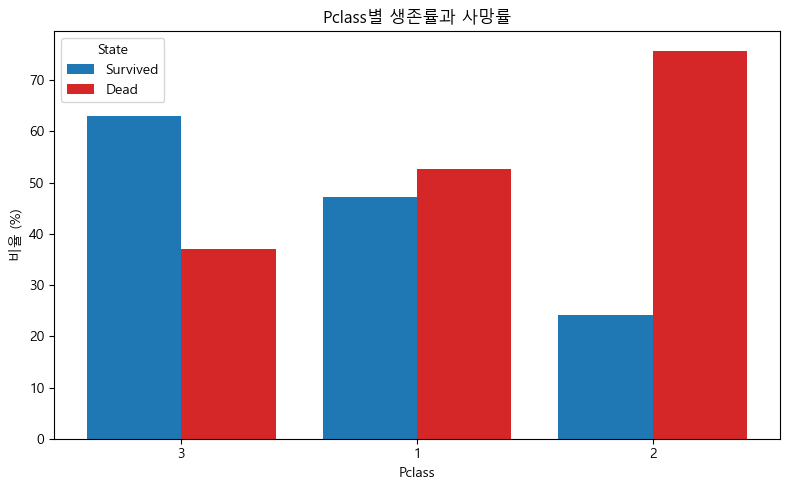

In [230]:
fig, ax = plt.subplots(figsize=(8, 5))

x = np.arange(len(pclass_categories))  # x축 위치
width = 0.4  # 막대 너비

# 생존률과 사망률 그래프
ax.bar(x - width / 2, survival_rates_pclass, width, label='Survived', color='tab:blue')
ax.bar(x + width / 2, dead_rates_pclass, width, label='Dead', color='tab:red')

# 그래프 꾸미기
ax.set_title('Pclass별 생존률과 사망률')
ax.set_xlabel('Pclass')
ax.set_ylabel('비율 (%)')
ax.set_xticks(x)
ax.set_xticklabels(pclass_categories)
ax.legend(title='State')

plt.tight_layout()
plt.show()

**객실 등급이 높아질수록 더 생존률이 높다**는 사실을 알 수 있다.

* 탑승 도시에 따른 생존률 - Embarked <a class="anchor" id="2_7"></a>

In [231]:
# Embarked별 생존률과 사망률 계산 함수
def calculate_embarked_rates(df):
    embarked_groups = df.groupby('Embarked')  # Embarked별 그룹화
    survival_rates = []
    dead_rates = []
    
    # 'Embarked' 고유값을 순회하면서 생존률과 사망률 계산
    for embarked, group in embarked_groups:
        total = group.shape[0]
        survived = group[group['Survived'] == 1].shape[0]
        dead = total - survived
        survival_rate = (survived / total) * 100
        dead_rate = (dead / total) * 100
        survival_rates.append(survival_rate)
        dead_rates.append(dead_rate)
    
    return survival_rates, dead_rates

# Embarked별 생존률과 사망률 계산
survival_rates_embarked, dead_rates_embarked = calculate_embarked_rates(train_df)

# Embarked의 고유 값들 (C, Q, S)
embarked_categories = train_df['Embarked'].dropna().unique().tolist()  # NaN 제외



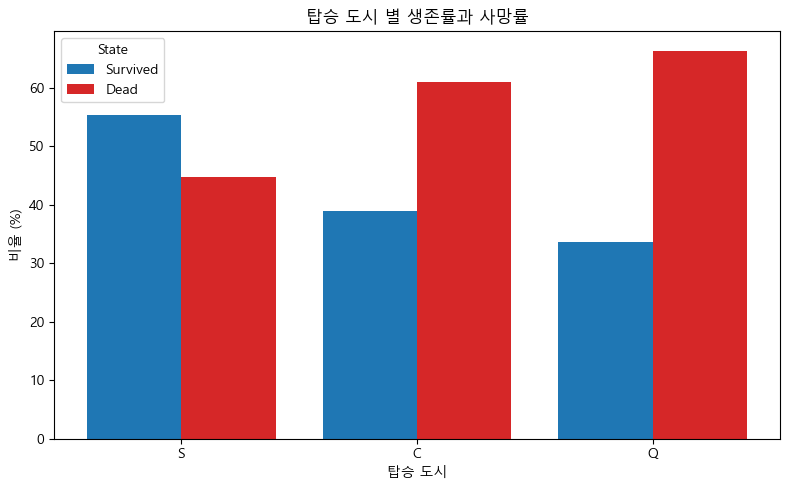

In [232]:
fig, ax = plt.subplots(figsize=(8, 5))

x = np.arange(len(embarked_categories))  # x축 위치
width = 0.4  # 막대 너비

# 생존률과 사망률 그래프
ax.bar(x - width / 2, survival_rates_embarked, width, label='Survived', color='tab:blue')
ax.bar(x + width / 2, dead_rates_embarked, width, label='Dead', color='tab:red')

# 그래프 꾸미기
ax.set_title('탑승 도시 별 생존률과 사망률')
ax.set_xlabel('탑승 도시')
ax.set_ylabel('비율 (%)')
ax.set_xticks(x)
ax.set_xticklabels(embarked_categories)
ax.legend(title='State')

plt.tight_layout()
plt.show()

S:사우햄스턴 C:셰르부르 Q: 퀸즈타운   
**사우햄스턴에서 탄 승객의 생존률이 가장 높다.**   
**퀸스타운에서 탄 승객의 생존률이 가장 낮다.**

### 데이터 정제 <a class="anchor" id="3"></a>

* Name의 Title 추출    <a class="anchor" id="3_1"></a>
타이틀 값으로 Ms,Mrs 와 같이 결혼여부 확인 가능. 호칭으로 성별 등 예측 가능하므로 예측과 무관한 이름 대신 타이틀 값 추출, 테스트 데이터에도 추가

In [233]:
train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.')
test_df['Title'] = test_df['Name'].str.extract('([A-Za-z]+)\.')
train_df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

Dr,Master 및 다른 소수 title의 성별 값으로, Mr, Mrs로 치환하는 과정   
밑은 사전적 의미로 알 수 있는 호칭별 성별
Mile, Ms -> miss   
Mme, Lady, Countess, Dona -> Mrs   
Major,Cor,Sir,Don,Jockheer,Capt -> Mr   
이와 같이 변경.   

In [234]:
train_df.loc[train_df['Title'].isin(['Mile', 'Ms']), 'Title'] = 'Miss'
train_df.loc[train_df['Title'].isin(['Mme', 'Lady', 'Countess', 'Dona','Mlle']), 'Title'] = 'Mrs'
train_df.loc[train_df['Title'].isin(['Major','Col','Sir','Don','Jonkheer','Capt','Rev']), 'Title'] = 'Mr'
test_df.loc[test_df['Title'].isin(['Mile', 'Ms']), 'Title'] = 'Miss'
test_df.loc[test_df['Title'].isin(['Mme', 'Lady', 'Countess', 'Dona','Mlle']), 'Title'] = 'Mrs'
test_df.loc[test_df['Title'].isin(['Major','Col','Sir','Don','Jonkheer','Capt','Rev']), 'Title'] = 'Mr'


* 성별에 관련 없어보이는 데이터 값 확인 - Dr, Master 

1. Dr <a class="anchor" id="3_1_1"></a>

In [235]:
train_df[train_df['Title'] == 'Dr']['Sex']

245      male
317      male
398      male
632      male
660      male
766      male
796    female
Name: Sex, dtype: object

해당하는 값으로 Mr,Miss로 치환.

In [236]:
train_df.loc[train_df['Title'] == 'Dr', 'Title'] = train_df.apply(lambda row: 'Mr' if row['Sex'] == 'male' else 'Miss', axis=1)
test_df.loc[test_df['Title'] == 'Dr', 'Title'] = test_df.apply(lambda row: 'Mr' if row['Sex'] == 'male' else 'Miss', axis=1)

2. Master <a class="anchor" id="3_1_2"></a>

In [237]:
train_df[(train_df['Title'] == 'Master') & (train_df['Sex'] != 'male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title


Master의 경우 남성을 지칭하는 호칭인것을 확인 가능, 모두 Mr로 변환

In [238]:
train_df.loc[train_df['Title'].isin(['Master']), 'Title'] = 'Mr'
test_df.loc[test_df['Title'].isin(['Master']), 'Title'] = 'Mr'

이제 필요 없어진 Name 컬럼을 drop한다.

In [239]:
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

In [240]:
print(train_df['Title'].unique())
print(test_df['Title'].unique())

['Mr' 'Mrs' 'Miss']
['Mr' 'Mrs' 'Miss']


* 데이터 범주화 <a class="anchor" id="3_2"></a>
    1. Age
    2. Fare


1. Age     <a class="anchor" id="3_2_1"></a>
NaN값은 Title값 별로로 나눠 해당 Title 그룹의 중간값으로 채우고 난 뒤 Age의 범주화, 10 단위로 나눠 범주화

In [241]:
total_median_train=train_df['Age'].median()
total_median_test=test_df['Age'].median()
# NaN을 title별로 groupby median으로 채우는 방법
def fill_nan_with_group_median(df, title_column, target_column, default_value):
    # 각 Title별 Age의 median을 계산
    median_values = df.groupby(title_column)[target_column].median()
    
    # 그룹별 median을 NaN 값에 대체
    df[target_column] = df.apply(
        lambda row: median_values[row[title_column]] if pd.isna(row[target_column]) else row[target_column],
        axis=1
    )
    
    # 만약 해당 그룹의 median이 NaN일 경우 전체 median으로 채우기
    df[target_column] = df[target_column].fillna(default_value)
    return df

# Age NaN 값 처리
train_df = fill_nan_with_group_median(train_df, 'Title', 'Age', default_value=total_median_train)
test_df = fill_nan_with_group_median(test_df, 'Title', 'Age', default_value=total_median_test)

def categorize_age(df):
    df.loc[df['Age'] <= 10, 'Age'] = 0
    df.loc[(df['Age'] > 10) & (df['Age'] <= 16), 'Age'] = 1
    df.loc[(df['Age'] > 16) & (df['Age'] <= 20), 'Age'] = 2
    df.loc[(df['Age'] > 20) & (df['Age'] <= 26), 'Age'] = 3
    df.loc[(df['Age'] > 26) & (df['Age'] <= 30), 'Age'] = 4
    df.loc[(df['Age'] > 30) & (df['Age'] <= 36), 'Age'] = 5
    df.loc[(df['Age'] > 36) & (df['Age'] <= 40), 'Age'] = 6
    df.loc[(df['Age'] > 40) & (df['Age'] <= 46), 'Age'] = 7
    df.loc[(df['Age'] > 46) & (df['Age'] <= 50), 'Age'] = 8
    df.loc[(df['Age'] > 50) & (df['Age'] <= 60), 'Age'] = 9
    df.loc[df['Age'] > 60, 'Age'] = 10

# 범주화 적용
categorize_age(train_df)
categorize_age(test_df)

train_df['Age'].value_counts()

Age
4.0     214
3.0     176
5.0     127
2.0      79
0.0      64
7.0      52
6.0      45
9.0      42
1.0      36
8.0      34
10.0     22
Name: count, dtype: int64

In [242]:
train_df['Age'].unique()

array([ 3.,  6.,  5.,  4.,  9.,  0.,  1.,  2., 10.,  7.,  8.])

2. Fare   <a class="anchor" id="3_2_2"></a>
Fare값을 10개의 구간으로 나눈다. 다만 어떻게 나누면 좋을지 보기 위해 그래프를 그려 알아본다.

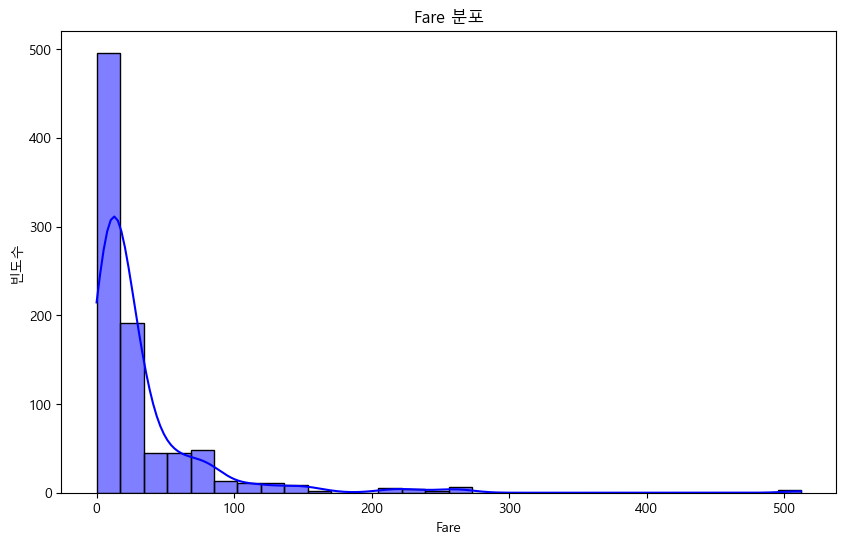

In [243]:
# 히스토그램으로 Fare 값 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Fare'], bins=30, kde=True, color='blue')
plt.title('Fare 분포')
plt.xlabel('Fare')
plt.ylabel('빈도수')
plt.show()

해당 히스토그램은 좌측으로 매우 편향된 형태이므로 로그값을 취해 조금 더 대칭적인 형태로 변환한다.

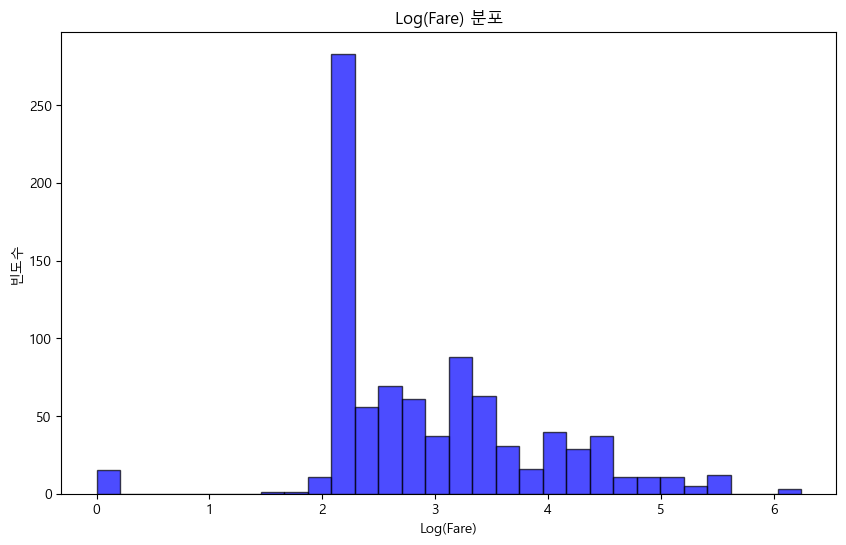

In [244]:
# 로그 변환 (0보다 큰 값에만 적용)
train_df['Log_Fare'] = np.log1p(train_df['Fare'])  # log1p: log(1 + x), 0을 안전하게 처리

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(train_df['Log_Fare'], bins=30, color='blue', edgecolor='black', alpha=0.7)

plt.title('Log(Fare) 분포')
plt.xlabel('Log(Fare)')
plt.ylabel('빈도수')

plt.show()

In [245]:
train_df['Log_Fare'].median()

2.737880811060884

In [246]:
print(np.percentile(train_df['Log_Fare'],25))
print(np.percentile(train_df['Log_Fare'],75))

2.187217791453408
3.4657359027997265


로그로 변환한 형태의 값의 중간값이 약 2.738, 제1사분위수가 약2.187, 제 3사분위수가 약 3.466 이므로 이를 기준으로 4구간으로 분할한다.

In [247]:
train_df.loc[train_df['Log_Fare']<=np.percentile(train_df['Log_Fare'],25), 'Fare']=0
train_df.loc[(train_df['Log_Fare'] > np.percentile(train_df['Log_Fare'],25)) & (train_df['Log_Fare'] <= train_df['Log_Fare'].median()), 'Fare']=1
train_df.loc[(train_df['Log_Fare'] > train_df['Log_Fare'].median()) & (train_df['Log_Fare'] <= np.percentile(train_df['Log_Fare'],75)), 'Fare']=1
train_df.loc[train_df['Log_Fare']>np.percentile(train_df['Log_Fare'],75), 'Fare']=3

train_df['Fare']

0      0.0
1      3.0
2      1.0
3      3.0
4      1.0
      ... 
886    1.0
887    1.0
888    1.0
889    1.0
890    0.0
Name: Fare, Length: 891, dtype: float64

##### 결측치 확인 및 기타 처리 <a class="anchor" id="3_3"></a>

In [248]:
#train.csv의 null 값 여부 확인
test_df.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Family           0
Title            0
dtype: int64

테스트 세트에 있는 Fare값 결측치는 해당 Fare값의 중간값에 해당하는 값 할당, 그리고 위와 같은 방법으로 범주화 <a class="anchor" id="3_3_1"></a>

In [249]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
test_df['Log_Fare'] = np.log1p(test_df['Fare'])  # log1p: log(1 + x), 0을 안전하게 처리

test_df.loc[test_df['Log_Fare'] <= np.percentile(test_df['Log_Fare'], 25), 'Fare'] = 0
test_df.loc[(test_df['Log_Fare'] > np.percentile(test_df['Log_Fare'], 25)) & (test_df['Log_Fare'] <= test_df['Log_Fare'].median()), 'Fare'] = 1
test_df.loc[(test_df['Log_Fare'] > test_df['Log_Fare'].median()) & (test_df['Log_Fare'] <= np.percentile(test_df['Log_Fare'], 75)), 'Fare'] = 2
test_df.loc[test_df['Log_Fare'] > np.percentile(test_df['Log_Fare'], 75), 'Fare'] = 3
test_df['Fare']

0      0.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
413    1.0
414    3.0
415    0.0
416    1.0
417    2.0
Name: Fare, Length: 418, dtype: float64

In [250]:
#train.csv의 null 값 여부 확인
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
Title            0
Log_Fare         0
dtype: int64

* Embarked NULL값 확인 <a class="anchor" id="3_3_2"></a>

In [251]:
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title,Log_Fare
61,62,1,1,female,6.0,0,0,113572,3.0,B28,NaN,0,Miss,4.394449
829,830,1,1,female,10.0,0,0,113572,3.0,B28,NaN,0,Mrs,4.394449


Embarked 결측치를 채우기 위해 공통점인 Cabin 이 B2-로 시작하는 데이터 검색

In [252]:
train_df[train_df['Cabin'].str.startswith('B2', na=False)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title,Log_Fare
61,62,1,1,female,6.0,0,0,113572,3.0,B28,NaN,0,Miss,4.394449
540,541,1,1,female,5.0,0,2,WE/P 5735,3.0,B22,S,2,Miss,4.276666
690,691,1,1,male,5.0,1,0,17474,3.0,B20,S,1,Mr,4.060443
745,746,0,1,male,10.0,1,1,WE/P 5735,3.0,B22,S,3,Mr,4.276666
781,782,1,1,female,2.0,1,0,17474,3.0,B20,S,1,Mrs,4.060443
829,830,1,1,female,10.0,0,0,113572,3.0,B28,NaN,0,Mrs,4.394449


* 나머지가 Embarked가 S인것으로, 해당 Embarked 값을 S로 채워넣기

In [253]:
train_df['Embarked']=train_df['Embarked'].fillna('S')
test_df['Embarked']=test_df['Embarked'].fillna('S')

* null 값이 너무 많은 cabin 특성은 제외  <a class="anchor" id="3_3_3"></a>

In [254]:
train_df.drop('Cabin',axis=1,inplace=True)
test_df.drop('Cabin',axis=1,inplace=True)

In [255]:
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Title,Log_Fare
0,1,0,3,male,3.0,1,0,A/5 21171,0.0,S,1,Mr,2.110213
1,2,1,1,female,6.0,1,0,PC 17599,3.0,C,1,Mrs,4.280593
2,3,1,3,female,3.0,0,0,STON/O2. 3101282,1.0,S,0,Miss,2.188856
3,4,1,1,female,5.0,1,0,113803,3.0,S,1,Mrs,3.990834
4,5,0,3,male,5.0,0,0,373450,1.0,S,0,Mr,2.202765


* 아직 문자열로 포함되는 값들 정리   <a class="anchor" id="3_3_4"></a>

1) Sex    <a class="anchor" id="3_3_4_1"></a>

In [256]:
train_df.loc[train_df['Sex']=='male','Sex']=0
train_df.loc[train_df['Sex']=='female','Sex']=1
test_df.loc[test_df['Sex']=='male','Sex']=0
test_df.loc[test_df['Sex']=='female','Sex']=1

2) Embarked    <a class="anchor" id="3_3_4_2"></a>

In [257]:
train_df.loc[train_df['Embarked']=='S','Embarked']=0
train_df.loc[train_df['Embarked']=='Q','Embarked']=1
train_df.loc[train_df['Embarked']=='C','Embarked']=2
test_df.loc[test_df['Embarked']=='S','Embarked']=0
test_df.loc[test_df['Embarked']=='Q','Embarked']=1
test_df.loc[test_df['Embarked']=='C','Embarked']=2

3. Title    <a class="anchor" id="3_3_4_3"></a>

In [258]:
train_df.loc[train_df['Title']=='Mr','Title']=0
train_df.loc[train_df['Title']=='Mrs','Title']=1
train_df.loc[train_df['Title']=='Miss','Title']=2
test_df.loc[test_df['Title']=='Mr','Title']=0
test_df.loc[test_df['Title']=='Mrs','Title']=1
test_df.loc[test_df['Title']=='Miss','Title']=2

train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Title,Log_Fare
0,1,0,3,0,3.0,1,0,A/5 21171,0.0,0,1,0,2.110213
1,2,1,1,1,6.0,1,0,PC 17599,3.0,2,1,1,4.280593
2,3,1,3,1,3.0,0,0,STON/O2. 3101282,1.0,0,0,2,2.188856
3,4,1,1,1,5.0,1,0,113803,3.0,0,1,1,3.990834
4,5,0,3,0,5.0,0,0,373450,1.0,0,0,0,2.202765


* 학습에 필요 없는 Column 제거    <a class="anchor" id="3_3_4_4"></a>

In [259]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Family       891 non-null    int64  
 11  Title        891 non-null    object 
 12  Log_Fare     891 non-null    float64
dtypes: float64(3), int64(6), object(4)
memory usage: 90.6+ KB


In [260]:
train_df.drop('PassengerId',axis=1,inplace=True)
train_df.drop('Log_Fare', axis=1, inplace=True)
train_df.drop('Ticket', axis=1, inplace=True)
test_df.drop('PassengerId',axis=1,inplace=True)
test_df.drop('Log_Fare', axis=1, inplace=True)
test_df.drop('Ticket', axis=1, inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Family    891 non-null    int64  
 9   Title     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [261]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
 7   Family    418 non-null    int64  
 8   Title     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


* 데이터 타입 통일 <a class="anchor" id="3_3_5"></a>

In [262]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Family        int64
Title        object
dtype: object

In [263]:
train_df['Sex'] = train_df['Sex'].astype(int)
train_df['Embarked'] = train_df['Embarked'].astype(int)
train_df['Age'] = train_df['Age'].astype(int)
train_df['Fare'] = train_df['Fare'].astype(int)
train_df['Title'] = train_df['Title'].astype(int)

In [264]:
test_df.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Family        int64
Title        object
dtype: object

In [265]:
test_df['Sex'] = test_df['Sex'].astype(int)
test_df['Embarked'] = test_df['Embarked'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)
test_df['Fare'] = test_df['Fare'].astype(int)
test_df['Title'] = test_df['Title'].astype(int)

In [266]:
#상관계수 확인
train_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title
Survived,1.000000,-0.338481,0.543351,-0.054428,-0.035322,0.081629,0.273802,0.167675,0.158934,0.485500
Pclass,-0.338481,1.000000,-0.131900,-0.353690,0.083081,0.018443,-0.628187,-0.162098,-0.052069,-0.080549
Sex,0.543351,-0.131900,1.000000,-0.089403,0.114631,0.245489,0.218192,0.108262,0.270437,0.932936
Age,-0.054428,-0.353690,-0.089403,1.000000,-0.231439,-0.157648,0.116067,0.012057,-0.229287,-0.192721
SibSp,-0.035322,0.083081,0.114631,-0.231439,1.000000,0.414838,0.355810,-0.068230,0.635195,0.109770
Parch,0.081629,0.018443,0.245489,-0.157648,0.414838,1.000000,0.338665,-0.039798,0.784287,0.195503
Fare,0.273802,-0.628187,0.218192,0.116067,0.355810,0.338665,1.000000,0.102374,0.423207,0.163079
Embarked,0.167675,-0.162098,0.108262,0.012057,-0.068230,-0.039798,0.102374,1.000000,0.004218,0.105108
Family,0.158934,-0.052069,0.270437,-0.229287,0.635195,0.784287,0.423207,0.004218,1.000000,0.208691
Title,0.485500,-0.080549,0.932936,-0.192721,0.109770,0.195503,0.163079,0.105108,0.208691,1.000000


### 모델 선택 <a class="anchor" id="4"></a>

In [267]:
train_input = train_df.drop('Survived', axis=1).values
train_target = train_df['Survived'].values
print(train_input.shape, train_target.shape)  

# 머신러닝 라이브러리 import 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#시각화-혼동행렬
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title("Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# 분류 보고서 시각화
def plot_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title("Classification Report Heatmap")
    plt.show()
    
# 모델 평가 함수
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # 훈련 데이터에 대해 예측
    model.fit(X_train, y_train)
    predicted_train = model.predict(X_train)
    
    # 정확도 출력
    accuracy = accuracy_score(y_train, predicted_train)
    
    # 혼동 행렬 및 분류 보고서 시각화
    plot_confusion_matrix(y_train, predicted_train)
    plot_classification_report(y_train, predicted_train)
    
    # 교차 검증
    score = cross_validate(model, X_train, y_train, return_train_score=True, n_jobs=-1, cv=StratifiedKFold())

    
    
    # 테스트 데이터에 대한 예측 및 평가
    predicted_test = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, predicted_test)
    print(f"테스트 정확도: {test_accuracy}")

   
    # 교차 검증 결과 출력
    print(f"훈련 정확도 (교차 검증 평균): {np.mean(score['train_score'])}")
    print(f"테스트 정확도 (교차 검증 평균): {np.mean(score['test_score'])}")
    print(f"훈련 정확도: {accuracy}")
    print(f"교차 검증 정확도 (cv=5) 평균: {np.mean(cross_val_score(model, X_train, y_train, cv=5))}")

(891, 9) (891,)


* KNN <a class="anchor" id="4_1"></a>

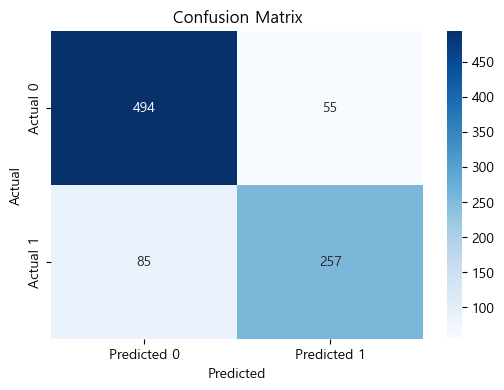

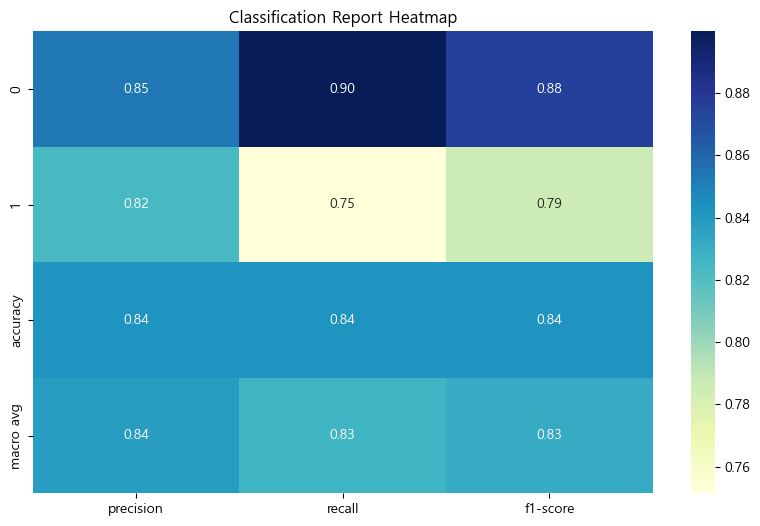

테스트 정확도: 0.8428731762065096
훈련 정확도 (교차 검증 평균): 0.8479265486865122
테스트 정확도 (교차 검증 평균): 0.7912748728893353
훈련 정확도: 0.8428731762065096
교차 검증 정확도 (cv=5) 평균: 0.7912748728893353


In [268]:
model = KNeighborsClassifier()
evaluate_model(model, train_input, train_target, train_input, train_target)

훈련 데이터와 테스트 데이터의 정확도의 차이가 크다. 과대 적합이 의심된다.

* 결정트리 <a class="anchor" id="4_2"></a>

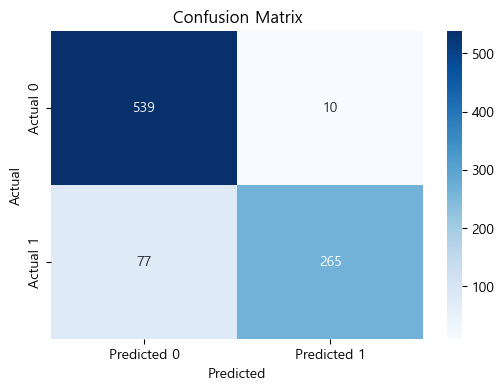

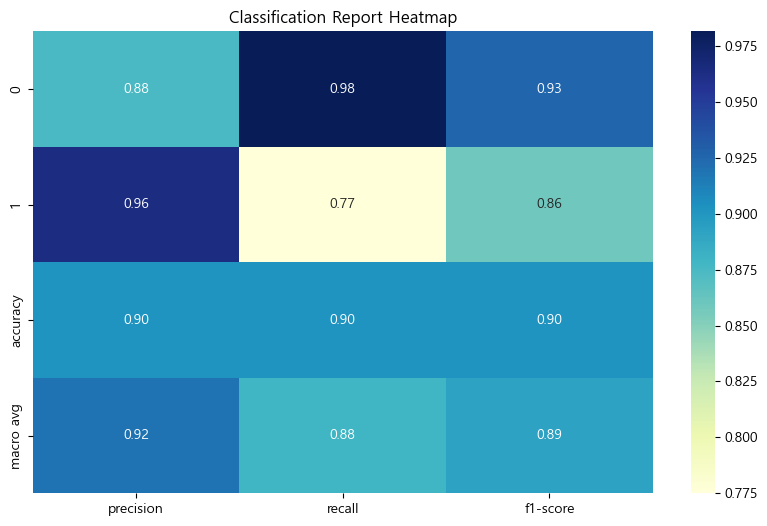

테스트 정확도: 0.9023569023569024
훈련 정확도 (교차 검증 평균): 0.9096525993980176
테스트 정확도 (교차 검증 평균): 0.8002636369342792
훈련 정확도: 0.9023569023569024
교차 검증 정확도 (cv=5) 평균: 0.7935346180402988


In [269]:
model = DecisionTreeClassifier()
evaluate_model(model, train_input, train_target, train_input, train_target)

훈련 데이터와 테스트 데이터의 정확도의 차이가 매우 크다. 과대 적합이 의심된다.

* 랜덤 포레스트    <a class="anchor" id="4_3"></a>

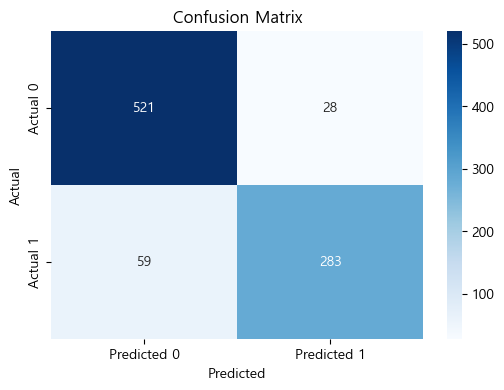

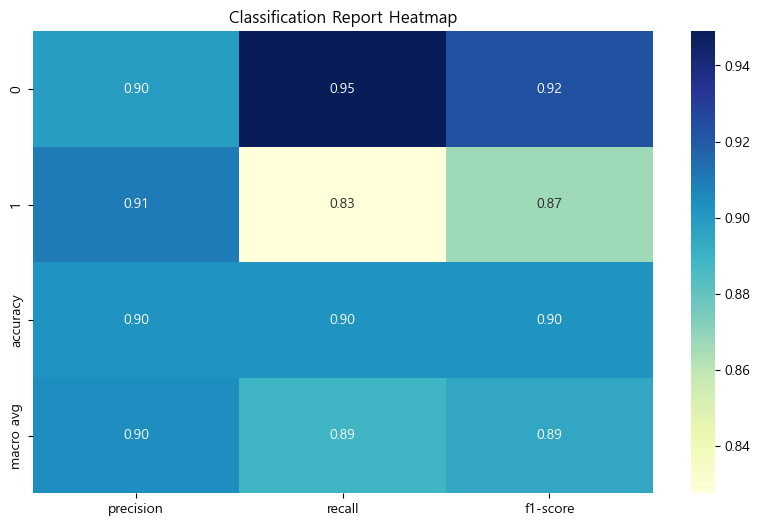

테스트 정확도: 0.9023569023569024
훈련 정확도 (교차 검증 평균): 0.9096525993980176
테스트 정확도 (교차 검증 평균): 0.8069926558282594
훈련 정확도: 0.9023569023569024
교차 검증 정확도 (cv=5) 평균: 0.8081162513338773


In [270]:
model = RandomForestClassifier()
evaluate_model(model, train_input, train_target, train_input, train_target)

훈련 데이터와 테스트 데이터의 정확도의 차이가 매우 크다. 과대 적합이 의심된다.

* 서포트 벡터 머신    <a class="anchor" id="4_4"></a>

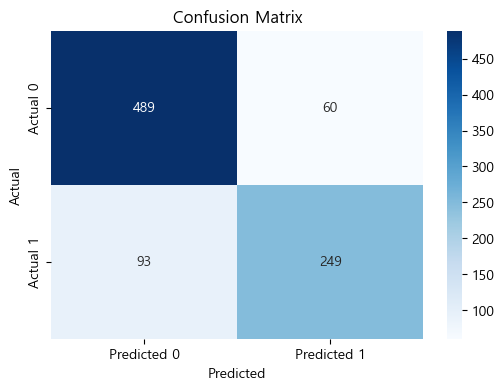

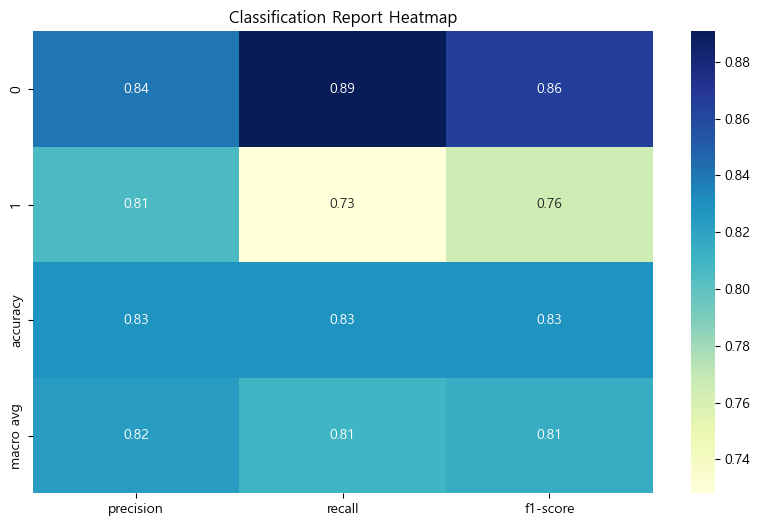

테스트 정확도: 0.8282828282828283
훈련 정확도 (교차 검증 평균): 0.8280016389050854
테스트 정확도 (교차 검증 평균): 0.8237963718536188
훈련 정확도: 0.8282828282828283
교차 검증 정확도 (cv=5) 평균: 0.8237963718536188


In [271]:
model = SVC()
evaluate_model(model, train_input, train_target, train_input, train_target)

훈련 데이터와 테스트 데이터의 정확도의 차이가 거의 없다. 과대적합이 없는 안정적인 모델이다.

* 로지스틱 회귀    <a class="anchor" id="4_5"></a>

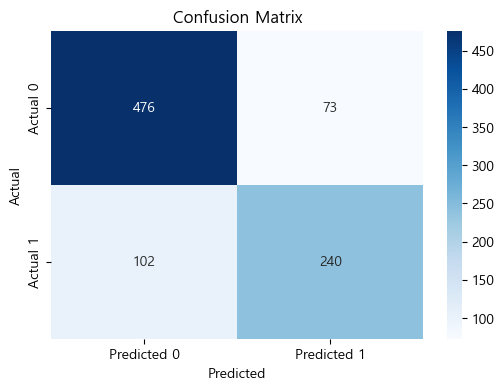

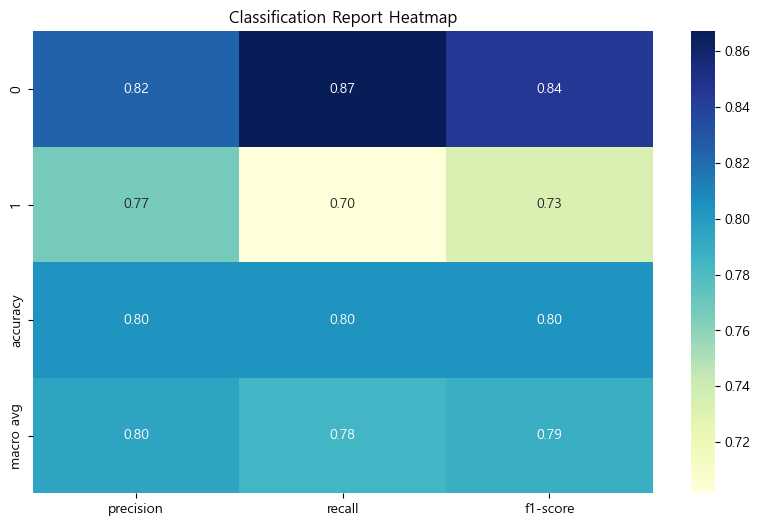

테스트 정확도: 0.8035914702581369
훈련 정확도 (교차 검증 평균): 0.8058334777881084
테스트 정확도 (교차 검증 평균): 0.8013621241604418
훈련 정확도: 0.8035914702581369
교차 검증 정확도 (cv=5) 평균: 0.8013621241604418


In [272]:
model=LogisticRegression()
evaluate_model(model, train_input, train_target, train_input, train_target)

훈련 데이터와 테스트 데이터의 정확도 차이가 거의 없다. 과대적합이 없는 안정적인 모델이다.

* 선형회귀    <a class="anchor" id="4_6"></a>

In [273]:
model = LinearRegression()

model.fit(train_input, train_target)

predicted = model.predict(train_input)

mse = mean_squared_error(train_target, predicted)
r2 = r2_score(train_target, predicted)

score = cross_validate(model, train_input, train_target, 
                       return_train_score=True, n_jobs=-1, 
                       cv=KFold())  


print(f"Train Score (Mean): {np.mean(score['train_score'])}")
print(f"Test Score (Mean): {np.mean(score['test_score'])}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")
cross_val_score(model, train_input, train_target, cv=5)

Train Score (Mean): 0.40875331889116523
Test Score (Mean): 0.3762077242825999
Mean Squared Error (MSE): 0.1404247002684873
R2 Score: 0.40625431952914404


array([0.3133304 , 0.37353569, 0.39471768, 0.33056622, 0.46888863])

이 모델은 정확도, 훈련점수, 테스트점수가 너무 낮다. 과소적합일 가능성이 크다. 제대로 학습하지 못했다.

* 정리 <a class="anchor" id="4_7"></a>
    * 5가지 모델 중 가장 적절한 모델은 로지스틱 회귀와 SVM이다
    * 모델로 SVM과 로지스틱 회귀를 선택한다.

### 모델 학습 및 추론 <a class="anchor" id="5"></a>

In [274]:
y = train_df['Survived']

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family','Title']
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])


1. SVM <a class="anchor" id="5_1"></a>

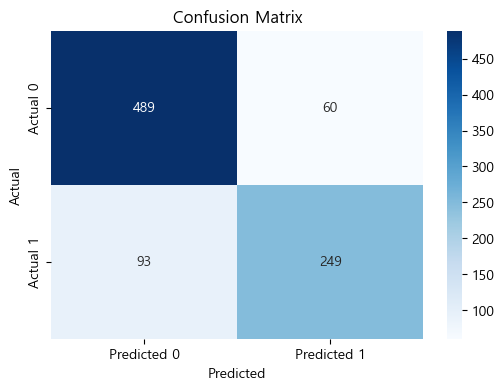

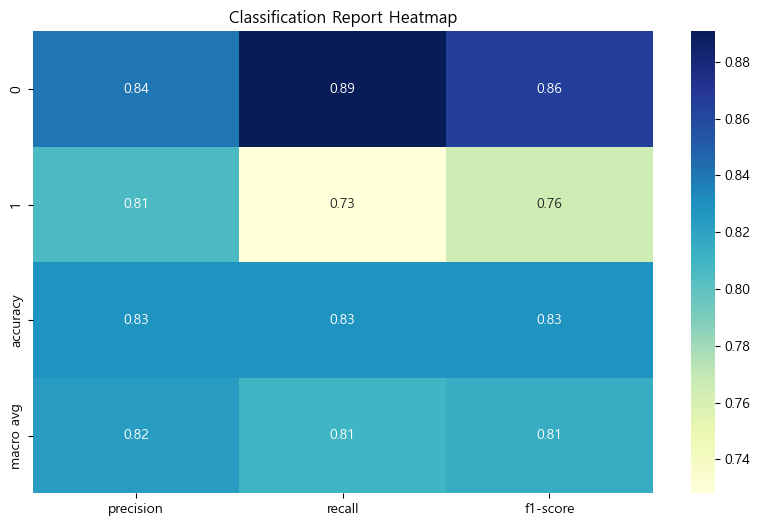

테스트 정확도: 1.0
훈련 정확도 (교차 검증 평균): 0.8280016389050854
테스트 정확도 (교차 검증 평균): 0.8237963718536188
훈련 정확도: 0.8282828282828283
교차 검증 정확도 (cv=5) 평균: 0.8237963718536188


In [275]:
# 모델 정의 및 훈련
model_SVC = SVC()
model_SVC.fit(X, y)

# 훈련 데이터에 대한 예측
train_predictions_SVC = model_SVC.predict(X)

# 테스트 데이터에 대한 예측
predictions_SVC = model_SVC.predict(X_test)
evaluate_model(model_SVC, X, y, X_test, predictions_SVC)

2. 로지스틱 회귀 <a class="anchor" id="5_2"></a>

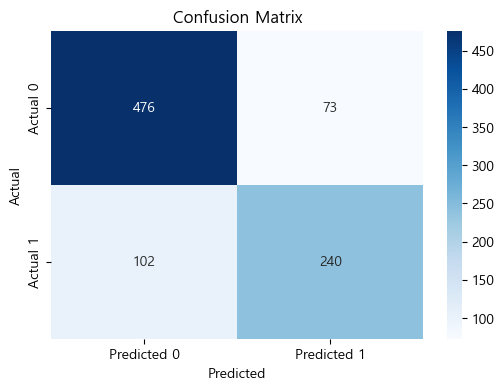

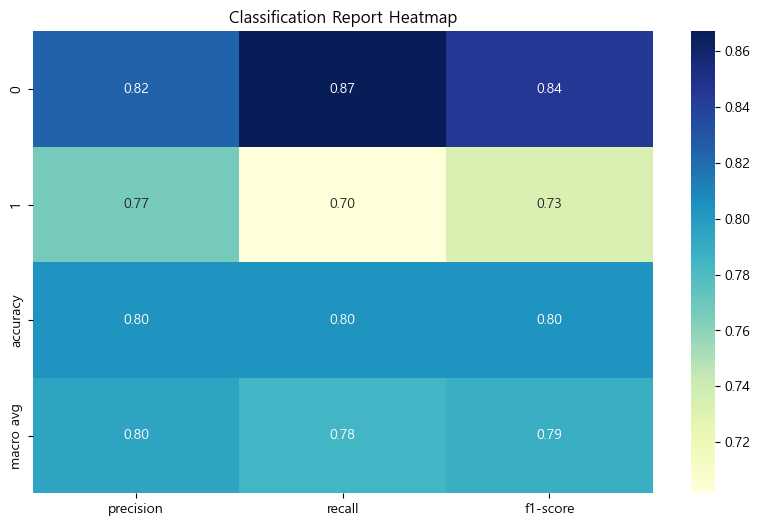

테스트 정확도: 1.0
훈련 정확도 (교차 검증 평균): 0.8058334777881084
테스트 정확도 (교차 검증 평균): 0.8013621241604418
훈련 정확도: 0.8035914702581369
교차 검증 정확도 (cv=5) 평균: 0.8013621241604418


In [276]:
model_LR = LogisticRegression()
model_LR.fit(X, y)
# 훈련 데이터에 대한 예측
train_predictions_LR = model_LR.predict(X)

# 테스트 데이터에 대한 예측
predictions_LR = model_LR.predict(X_test)

# 모델 평가
evaluate_model(model_LR, X, y, X_test, predictions_LR)